In [2]:
import duckdb
import pandas as pd


In [3]:
import os
# Get the current working directory
cwd = os.getcwd()
print(cwd)
# Construct the desired file path
file_path = os.path.join(cwd,'interim', 'mydb.db')
print(file_path)

/var/home/fcabello/git/Duckdb-Fastapi-Nextjs-Dashboard-Example/01data
/var/home/fcabello/git/Duckdb-Fastapi-Nextjs-Dashboard-Example/01data/interim/mydb.db


In [12]:
db = duckdb.connect()


db.execute(f"IMPORT DATABASE '{file_path}'")
display(db.execute('SHOW TABLES').df())

display(db.execute('SELECT * FROM companies').df())
display(db.execute('SELECT * FROM timeseries_dataset').df())


db.close()

,name
0,companies
1,timeseries_dataset


,organization,zone_id,zone,polygon_decoded
0,gsinima,25,caldera,"-70.87416271129088,-27.014335684429216;-70.834..."
1,adasa,27,antofagasta,"-70.42940139770508,-23.534481206739827;-70.431..."


,timestamp,variable,organization,value,ingestion_time
0,2024-04-13 08:00:00-04:00,CHL-01,adasa,1.451352,2024-04-13 20:00:00-04:00
1,2024-04-13 08:00:00-04:00,SPM-01,adasa,3.337477,2024-04-13 20:00:00-04:00
2,2024-04-13 08:00:00-04:00,CHL-01,gsinima,1.010194,2024-04-13 20:00:00-04:00
3,2024-04-13 08:00:00-04:00,SPM-01,gsinima,NaN,2024-04-13 20:00:00-04:00
4,2024-04-12 08:00:00-04:00,SPM-01,adasa,0.949812,2024-04-12 20:00:00-04:00
...,...,...,...,...,...
685,2023-11-08 09:00:00-03:00,SPM-01,gsinima,0.648428,2023-11-10 21:00:00-03:00
686,2023-11-07 09:00:00-03:00,CHL-01,adasa,0.766285,2023-11-10 21:00:00-03:00
687,2023-11-07 09:00:00-03:00,CHL-01,gsinima,2.131320,2023-11-10 21:00:00-03:00
688,2023-11-07 09:00:00-03:00,SPM-01,adasa,NaN,2023-11-10 21:00:00-03:00


In [ ]:
db = duckdb.connect()


db.execute(f"IMPORT DATABASE '{file_path}'")
display(db.execute('SHOW TABLES').df())

display(db.execute('SELECT * FROM companies').df())
display(db.execute('SELECT * FROM timeseries_dataset').df())


db.close()

In [13]:
db = duckdb.connect()


db.execute(f"IMPORT DATABASE '{file_path}'")

df = db.execute('SELECT * FROM timeseries_dataset').df()




db.close()

In [34]:
from datetime import datetime
db = duckdb.connect()


db.execute(f"IMPORT DATABASE '{file_path}'")

query = """
    SELECT value, timestamp
    FROM timeseries_dataset
    WHERE variable = ?
        AND organization = ?
        AND timestamp BETWEEN ? AND ?
    ORDER BY timestamp;
"""

result = db.execute(query, ['CHL-01', 
                                    'adasa', 
                                    datetime(2023, 12, 1), 
                                    datetime(2024, 12, 1)]).fetchdf()

display(result['value'])

db.close()


0       7.203716
1       2.586968
2       4.952363
3       3.282452
4       3.191600
         ...    
141    13.456204
142     0.918588
143    14.049045
144     4.514719
145     1.451352
Name: value, Length: 146, dtype: float64

In [28]:
display(df.columns)
display(df['variable'].unique())
display(df['organization'].unique())
variables = df['variable'].unique()
organizations = df['organization'].unique()

Index(['timestamp', 'variable', 'organization', 'value', 'ingestion_time'], dtype='object')

array(['CHL-01', 'SPM-01'], dtype=object)

array(['adasa', 'gsinima'], dtype=object)

<Axes: title={'center': 'adasa -> CHL-01'}, xlabel='timestamp'>

<Axes: title={'center': 'adasa -> SPM-01'}, xlabel='timestamp'>

<Axes: title={'center': 'gsinima -> CHL-01'}, xlabel='timestamp'>

<Axes: title={'center': 'gsinima -> SPM-01'}, xlabel='timestamp'>

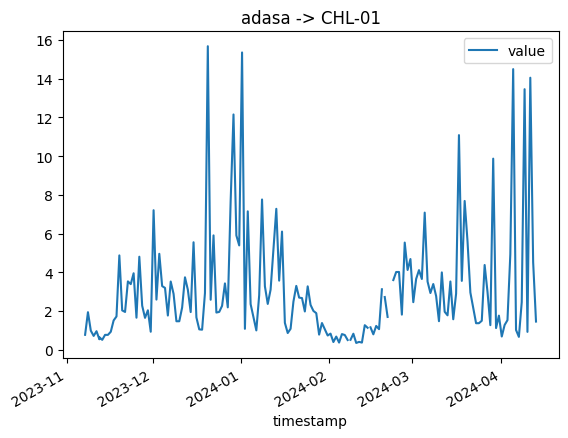

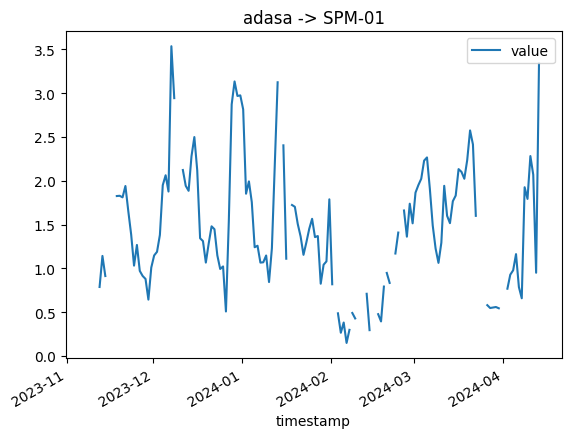

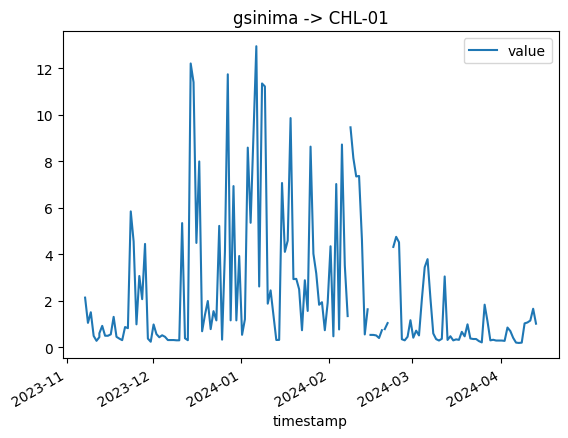

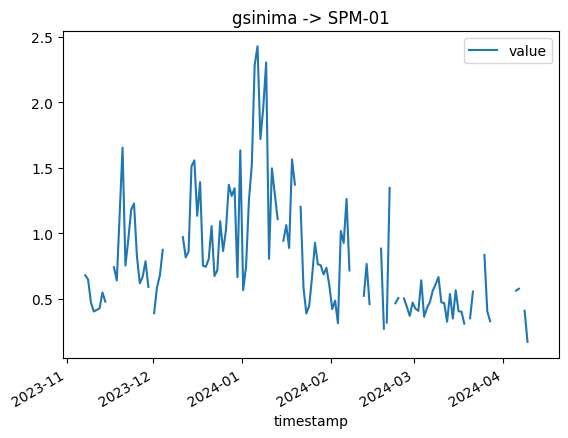

In [31]:
from itertools import product

every_org_var = product(organizations, variables)

for org, var in every_org_var:
    display(df[(df["organization"] == org) & (df["variable"] == var)].plot(x='timestamp', y='value', title=f'{org} -> {var}'))
